In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
# check the size of the sample and verify number of columns
df.shape

(180, 9)

In [4]:
# check product models
print(df['Product'].unique())

['TM195' 'TM498' 'TM798']


For now we know that there are three models of product.

# <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#228B22;text-decoration:underline"> Uni-Variate Analysis:

For the sake of univariate analysis, let's use only one column of the data - 'Miles' and name this Series as 'df_miles'.

In [5]:
df_miles = df['Miles']
df_miles.head()

0    112
1     75
2     66
3     85
4     47
Name: Miles, dtype: int64

In [6]:
len(df_miles)

180

In [7]:
# check if the df_miles has any missing value
df_miles.isnull().sum()

0

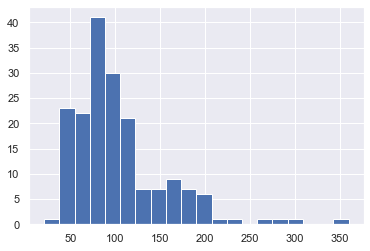

In [8]:
# Plotting a histogram to observe the frequency of occurance for each of 20 class intervals 
plt.hist(df_miles, bins=20);

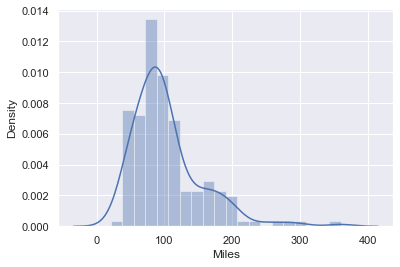

In [9]:
# plotting a frequency polygon superimposed on a histogram using the seaborn package 
# with optimised class intervals created automatically.
sns.distplot(df_miles);

The two plots above show that the variable 'Miles' has a positively-skewed distribution. 

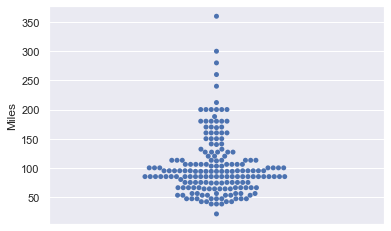

In [10]:
sns.swarmplot(y=df_miles);

From the swarmplot above we notice that majority of customers have thier expected-miles-to-run falling within the range of 48 miles to 150 miles.

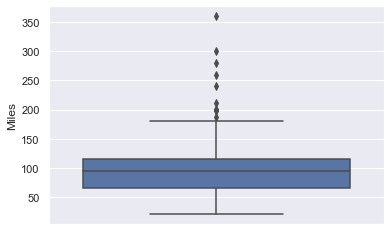

In [11]:
sns.boxplot(y=df_miles);

From the boxplot above we can see that the median is at about 98 miles, with 25th percentile at around 68 miles and 75th percentile at around 120 miles. On the other hand, there are some outliers with expected-miles-to-run exceeded 180 miles.

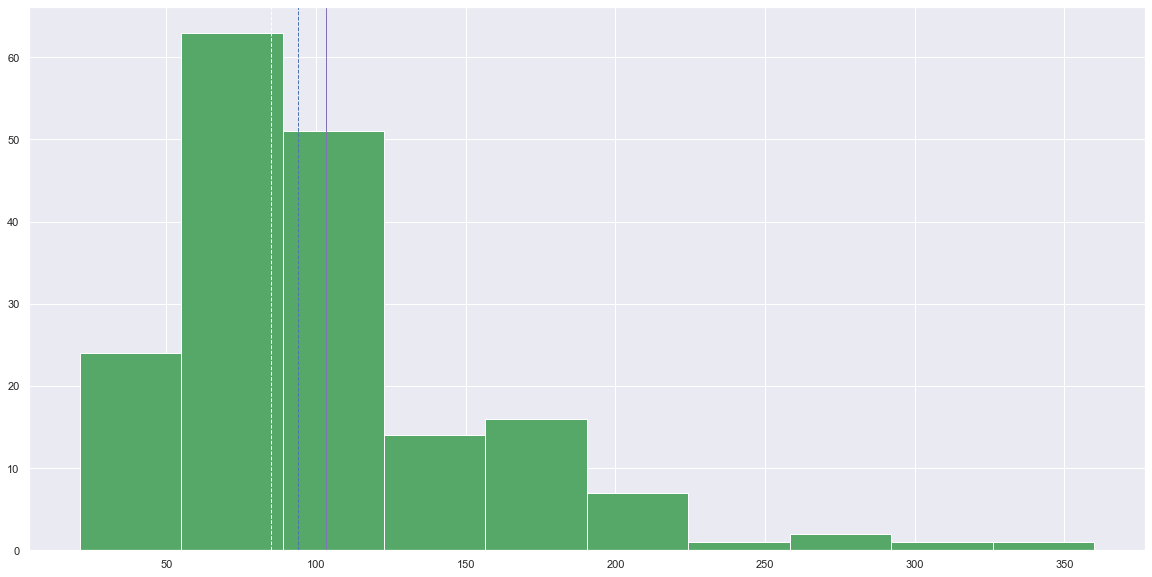

In [12]:
# Let's take a closer look at the distribution by plotting a simple histogram with 10 bins.
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(df_miles, color='g') # plots a simple histogram
plt.axvline(df_miles.mean(), color='m', linewidth=1)
plt.axvline(df_miles.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df_miles.mode()[0], color='w', linestyle='dashed', linewidth=1)
plt.show()

<font color=darkblue>
    
- In the above histogram we can see that the second bin with class limits (56, 91) has the most number of observations.
- A bulk of the observations lie within the first five classes. The rest of the 5 classes contain only a very few observations.
- In this case we are measuring the expected miles to be run by customers. We can safely say based on visual observation that most of the customers are expected to run less than 200 miles.
- There are very few customers on the data expected to run more than 200 miles. Once we pass the 225 miles point the number of observations drops further.
- On the figure above, the mean is represented by the magenta line, the mode by the white line, while median is represented by the blue line.
- We can see from the above figure that the mode is the lower than median and mean, while mean is higher than the other two measures. 
- The distribution is right-skewed.

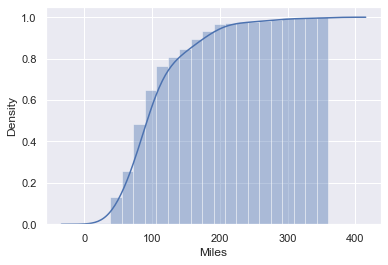

In [13]:
# Plotting its cummulative distribution
sns.distplot(df_miles, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

# <span style="font-family: Arial; font-weight:bold;font-size:0.8em;color:#228B22;text-decoration:underline"> Multi-Variate Analysis:

In [14]:
# Check overall info of entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Education, Usage and Fitness are integer type currently. 
Since they are categorical variables here, we could convert them into category data type to carry out the analysis. However, there could be some relations that these three variables might have with numerical variables income and miles. Let's try study their relationship with existing setting first:

In [15]:
# Checking the three categorical features
print("Education includes: ", sorted(df.Education.unique()))
print("\n")
print("Usage includes: ", sorted(df.Usage.unique()))
print("\n")
print("Fintess inclues: ", sorted(df.Fitness.unique()))

Education includes:  [12, 13, 14, 15, 16, 18, 20, 21]


Usage includes:  [2, 3, 4, 5, 6, 7]


Fintess inclues:  [1, 2, 3, 4, 5]


In [16]:
# Meanwhile also check if there is any missing value on the entire dataset
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

From the information above we know that there isn't any missing value, so we may proceed into analysis phase straightaway.

In [17]:
# Retrieve the numerical measures about the dataset
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- The average age of customers is 29 years old with a deviation of 7 years. Median age is slightly younger at 26 years old.
- The average income of customers is about $53.7K with a wide range of variance.
- The average miles expected to run is 103 miles with minimum at 21 miles and maximum at 360 miles. Its median is however closer to mean at 94 miles.

In [18]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

Assumming that the sample of 180 customers were randomly selected from whole population of customers, having 104 male customers and 76 female customers is likely because there are more male customers buying tradmill products than female customers do.

In [19]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Again, assuming that the sample of customers were randomly selected, the dataset has the most TM195 buyers.

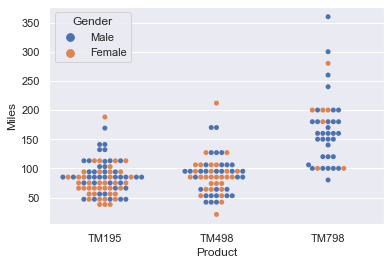

In [20]:
sns.swarmplot(df['Product'], df['Miles'], hue=df['Gender']); 

- From the swarmplot above we could see that more male than female prefer TM798 model.
- Another point we notice is that, customers who purchased TM798 model tend to have longer expected miles to run.

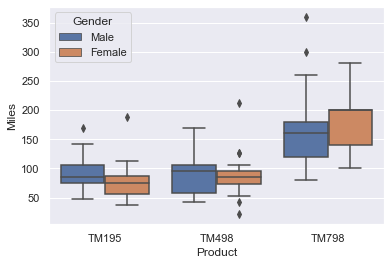

In [21]:
# Let's study the expected miles to run for different gender for each product model
sns.boxplot(df['Product'], df['Miles'], hue=df['Gender']); 

- The boxplot above shows that more than half of TM798 customers are expected to run more than 150 miles.
- In contrast, more than half of TM195 and TM498 customers are expected to run less than 100 miles.

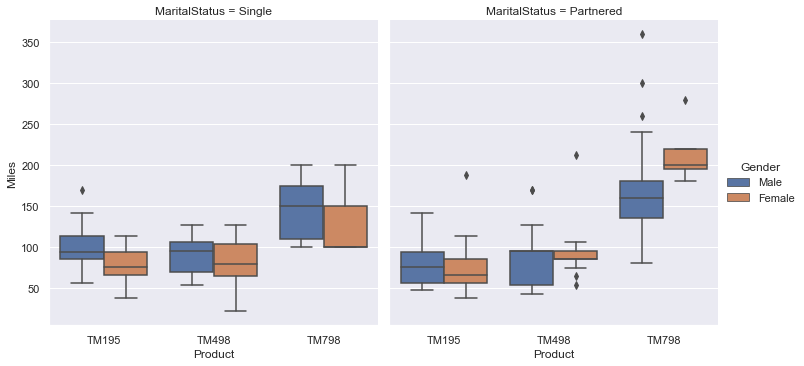

In [22]:
#Let's try further divide the previous group into single vs partnered
sns.catplot(x='Product', y='Miles',data=df, hue='Gender', col='MaritalStatus', kind = 'box');

- The married customers of TM798 model have slightly longer expected run than those who are single.
- Significantly more male single customers of TM195 model have longer expected run than those who are married.
- Sighted more outliers within partnered group.

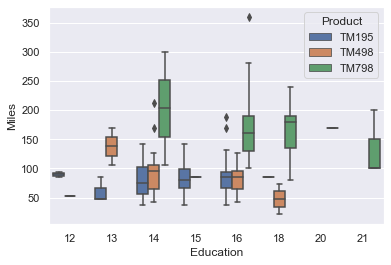

In [23]:
# Next, check if higher education led to longer expected miles to be run by customers
sns.boxplot(df['Education'], df['Miles'], hue=df['Product']); 

- Education level doesn't seem to be a clear factor to affect which model to buy and how long their expected runs are going to be.

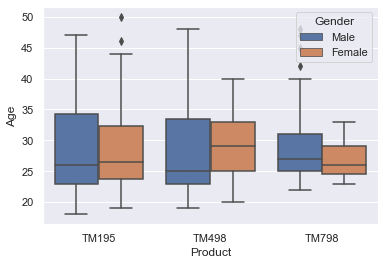

In [24]:
# Now let's check the age group of customers
sns.boxplot(df['Product'], df['Age'], hue=df['Gender']); 

- We can safely deduce from the boxplot above that majority of both male and female customers are from 23 years old to 35 years old.
- Among this age group we can notice that the buyers of TM798 model are mainly from 25 years old to 31 years old only.

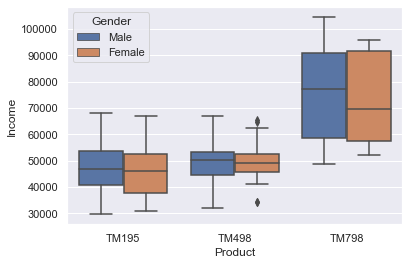

In [25]:
# Let's also check the income of customers of each product model
sns.boxplot(df['Product'], df['Income'], hue=df['Gender']); 

- Interestingly, customers of TM798 model have significantly higher income than customers of the other two treadmill models.

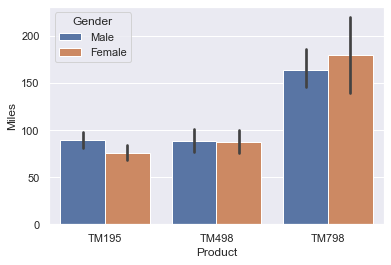

In [26]:
# We shall also look into the mean of expected miles to be run 
sns.barplot(x='Product', y='Miles', data=df, hue='Gender'); 

- The mean of expected miles to run is more than 150 miles for customers of TM798 model, but less than 100 miles for customers of the other two models.

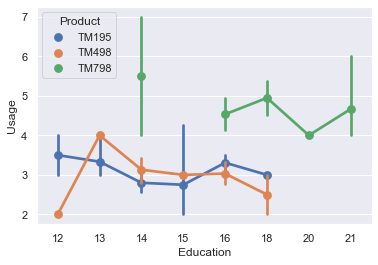

In [28]:
# Let's also look at the relationship between the usage and education
sns.pointplot(x='Education', y='Usage', data=df, hue='Product'); 

- The pointplot shows similar result as the barplot for average miles expected to run vs education level.
- It is expected as longer expected run means more frequent usage.

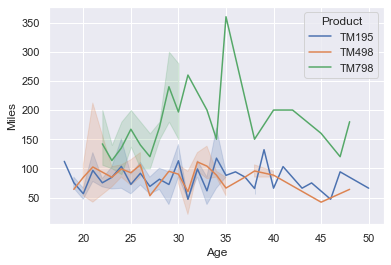

In [29]:
# Let's now look at the relationship between age and miles
sns.lineplot(x='Age', y='Miles', data=df, hue='Product'); 

- Notice that the customers of TM195 and TM498 models have relatively similar expected-miles-to-run across ages.
- On the other hand, the customers of TM798 model age around 35 years old tend to have longer expected-miles-to-run than other age group who are also customers of TM798 models. However, from earlier analysis we know that majority of TM798 customers are younger than 31 years old, so the observation of 35 years old might not be a good representative. We could instead believe that the age of 30 years old is a better choice to be said having longer expected run than its other age group.

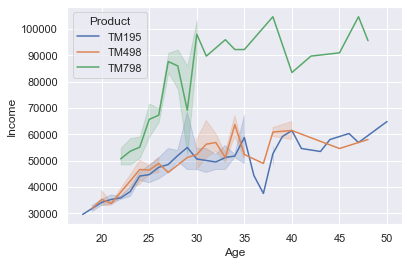

In [30]:
# We shall now look at the relationship between age and income
sns.lineplot(x='Age', y='Income', data=df, hue='Product'); 

- Generally, the older a customer is, the higher income he or she earns. 
- However, the customers of TM798 model tend to have achieved high income at young age. The graph shows that TM798 customers at 30 years old or above has around $95,000 of income.

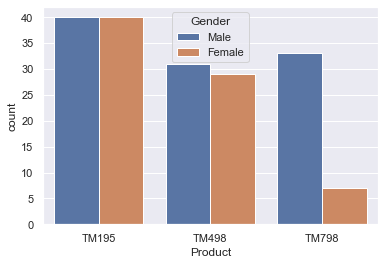

In [31]:
# Let's check the number of customers for each gender
sns.countplot(df.Product, hue=df.Gender);

- TM798 model has about 4.5 times more male customers than female

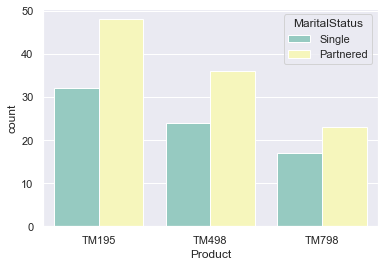

In [32]:
# now let's see the number of customers according to their marital status
sns.countplot(df.Product, hue=df.MaritalStatus, palette='Set3');

- There are generally more customers who are already married. The difference is especially significant for TM195 customers.

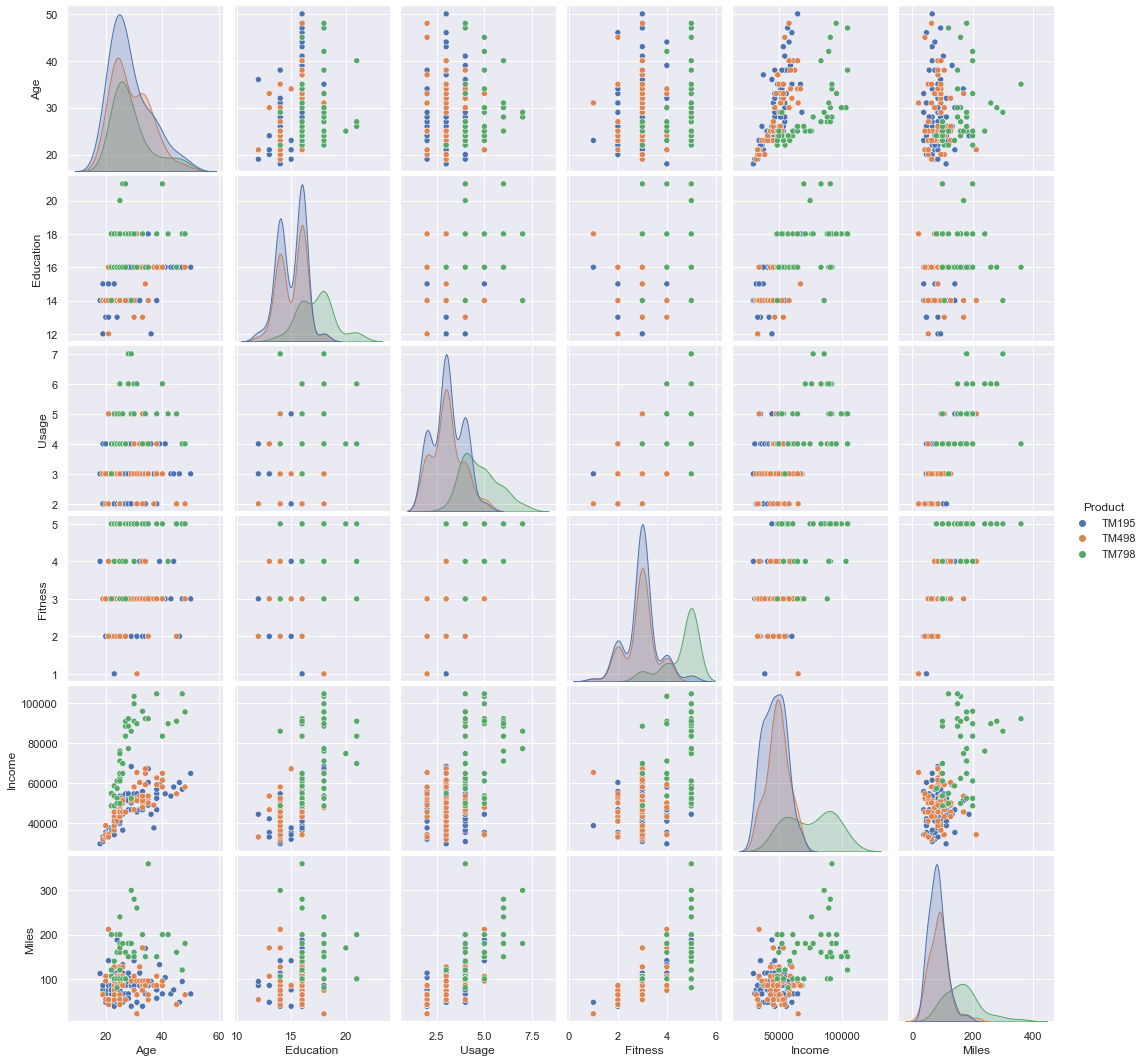

In [33]:
# Let's now look at the association for every pair of variables
sns.pairplot(df,hue='Product');

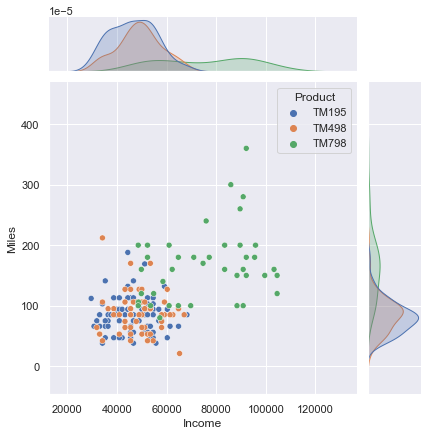

In [34]:
# Income and Miles seem to have linear relationship, let's take a closer look
sns.jointplot(x='Income', y='Miles',data=df, hue='Product');

- It seems that people with higher income tend to have longer expected run
- Also noted on the same insights that nearly all TM798 customers are earning higher income, while all the customers of the other two models are clustered together at the bottom left of the jointplot above.

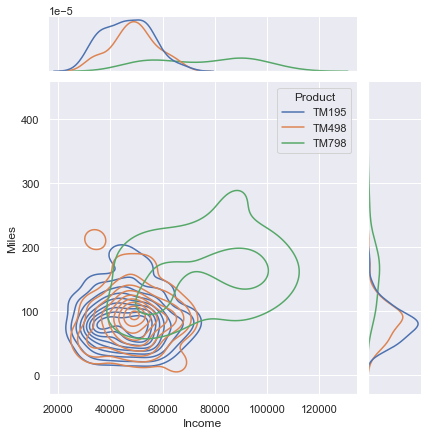

In [35]:
# A KDE plot might give a better view
sns.jointplot(x='Income', y='Miles',data=df,kind='kde', hue='Product');

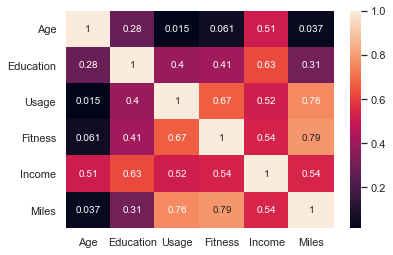

In [36]:
# Calculate the correlation between every possible pair of variables
df_corr = df.corr()

sns.heatmap(df_corr, annot=True); # plot the correlation coefficients as a heatmap

Notice that the Usage and Fitness have significant correlation with Miles, thus we might better analyse the data by removing Usage and Fintness. However, in order to derive more insights without losing data about Usage and Fitness, we may try convert them into categories instead. In addition, while we already know from the above analysis that Education isn't really co-related with any other variables, it wouldn't be meaningful to further analyse it with numerical approach, so we also convert Education into category.

In [37]:
# Converting Eudaction, Usage and Fitness into categories
df[['Education','Usage','Fitness']] = df[['Education','Usage','Fitness']].astype('category')

In [38]:
# Let's relook the details of the data by including all categorical and numerical variables now
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.0,180,180.0,180.0,180.000000,180.000000
unique,3,NaN,2,8.0,2,6.0,5.0,NaN,NaN
top,TM195,NaN,Male,16.0,Partnered,3.0,3.0,NaN,NaN
freq,80,NaN,104,85.0,107,69.0,97.0,NaN,NaN
mean,NaN,28.788889,NaN,NaN,NaN,NaN,NaN,53719.577778,103.194444
std,NaN,6.943498,NaN,NaN,NaN,NaN,NaN,16506.684226,51.863605
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,29562.000000,21.000000
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,44058.750000,66.000000
50%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,50596.500000,94.000000
75%,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,58668.000000,114.750000


Now we could clear see the categorical features of some variables, such as:
- there are 8 levels of education with most customers are from level 16 (85 out of the sample of 180 customers);
- 107 out of the sample 180 customers are partnered.

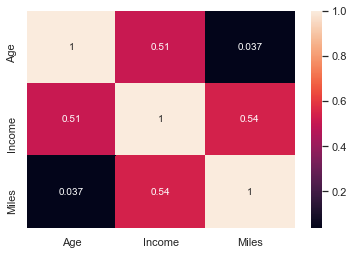

In [39]:
# Now we recalculate the correlation between every possible pair of variables and plot a new heatmap
df_corr = df.corr()
sns.heatmap(df_corr, annot=True);

Income is somewhat co-related with Miles. We may focus on studying the variables of Age and Miles to see if we can find better insights of the data.

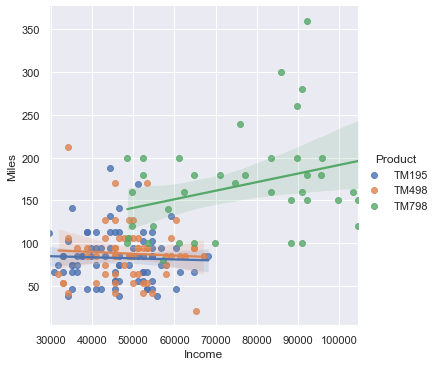

In [40]:
# Before we continue, let's take a quick look at the linear regression plot between Income and Miles first
sns.lmplot(x='Income', y='Miles',data=df, hue='Product');

- While heatmap reflected some extent of corelation between Income and Miles, it turns out that when we segregate the data into respective models, there isn't really a solid corelation between Income and Miles anymore.

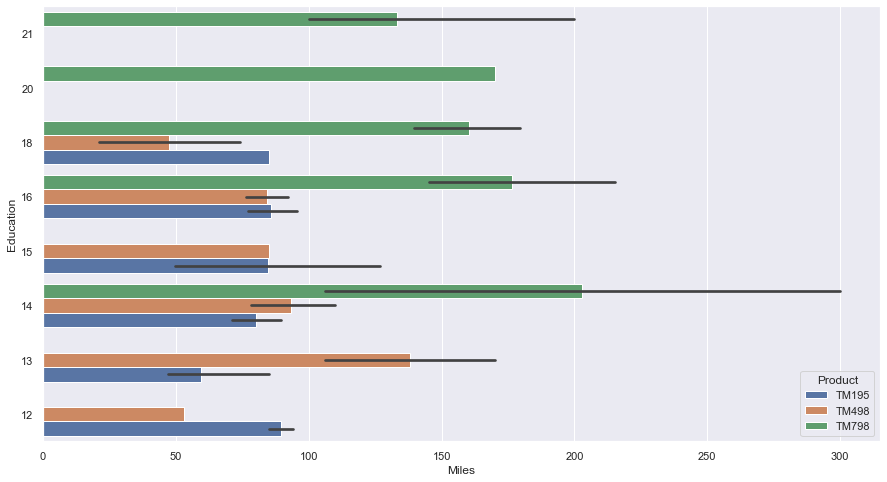

In [41]:
# We may also check whether higher education level leads to longer expected run
plt.figure(figsize = (15,8))
ax = sns.barplot(x='Miles', y='Education', data=df, hue='Product')
ax.invert_yaxis()

- Generally speaking the higher education level the customers are from, the longer miles they are expected to run.
- Meantime, it also shows that the customers with higher education prefer to buy TM798 model.

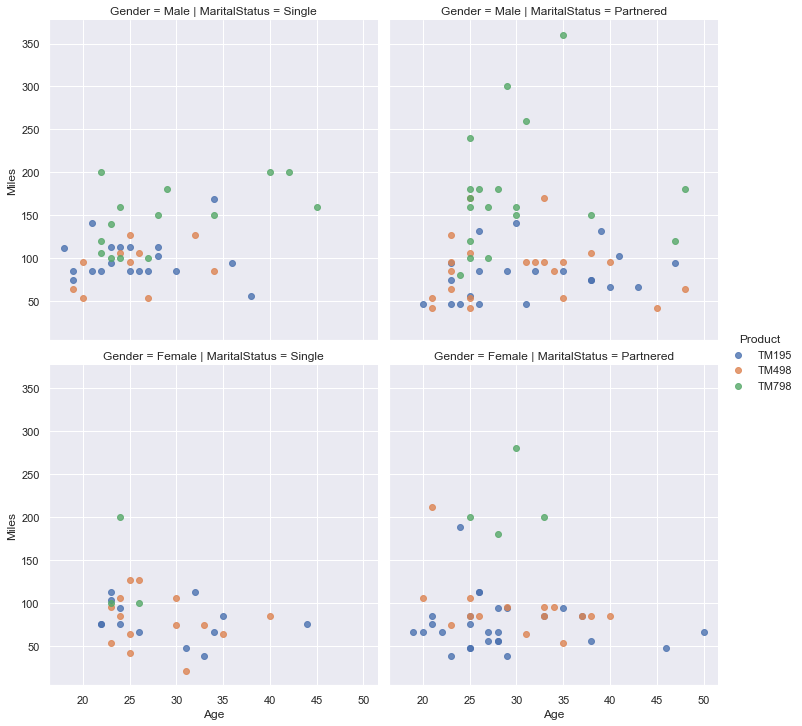

In [42]:
# We previously studied the association between Age and Miles.
# Let's take a closer look with different marital status and genders
sns.lmplot(x='Age', y='Miles',data=df, fit_reg=False, hue='Product', row='Gender',col='MaritalStatus');

- A clear observation from the above is still majority customers of TM798 model are young male from 22 years old to 35 years old.

#### Before we jump into final recommendation, let's take a look at the overall association among Gender, Marital Status, and Age for each of the product model.

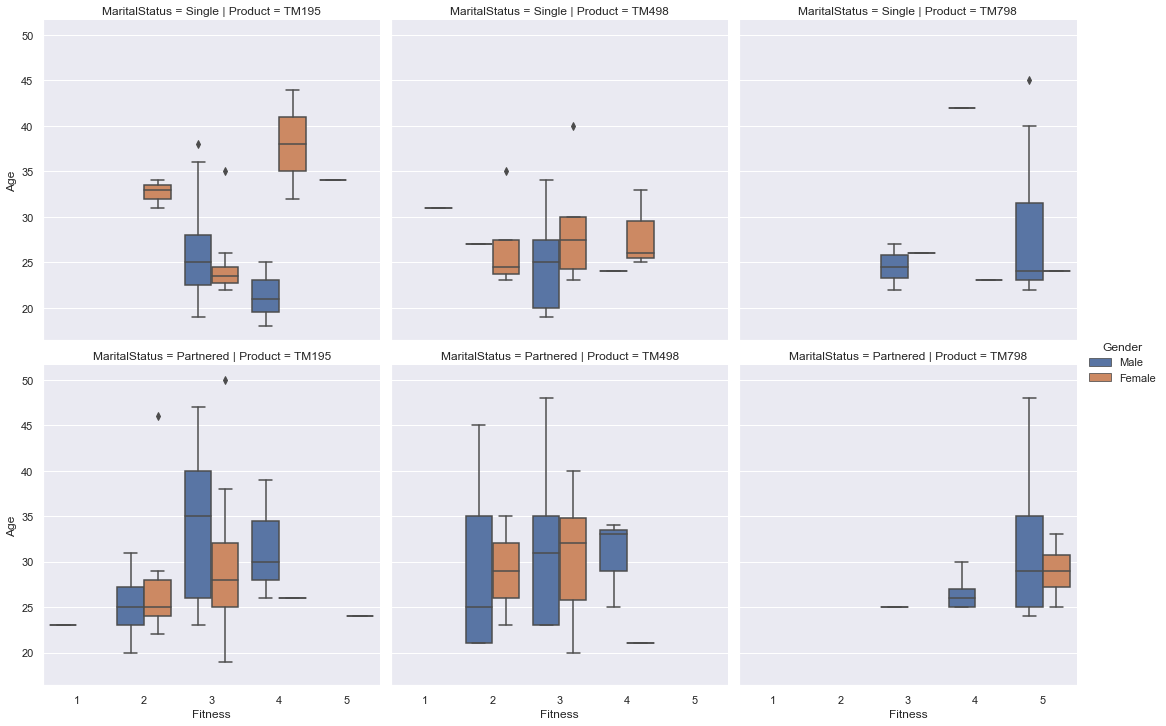

In [43]:
sns.catplot(x='Fitness', y='Age', hue='Gender', row='MaritalStatus', col='Product', data=df, kind='box');

- The catplot above is to relook the overall associations among previously studied variables with replacement of Miles by Fitness
- We notice that the customers of TM798 are generally the customers who self-rated themselve very fit. This is in tandem with higher expected miles to run by the same group.
- Again generally majority of customers are below 35 years old across all product models.
- Interestingly though, single female customers of TM195 model who rated 4 for their fitness are at least 75% from above age of 35.

### Conclusion & Final Recomendation:

<font color=darkblue>
    
- The company can target male highly-educated people from the age of 25 years old to 31 years old and with income higher than $60,000 to buy TM798 model. One reason is because they are relatively more capable to afford to buy treadmill, and tend to use the equipment more often, which will lead to better fitness. High usage would likely cause the equipment to get worn off faster and thus this group of customers would likely become a recurring customers. 

- For TM195 model, the company can target customers who are 25 to 35 years old and already married. There are relatively more married people than the singles likely to buy this model.

- While the analysis result of TM498 model is being similar to TM195, it is highly recomended to focus effort on promoting TM195 model to customers at lower income than $60,000. This is because TM195 is generally more preferred by the people from same group in terms of income level, age, marital status and gender. 